# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


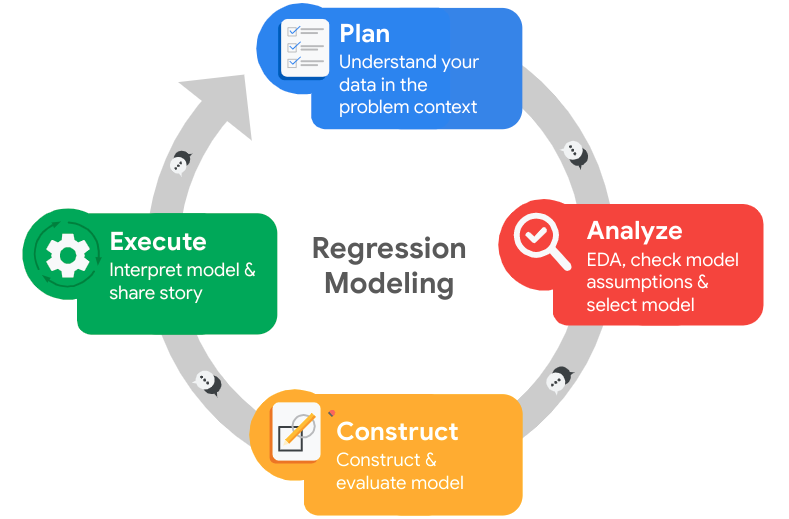

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders of the project are the heads of the HR department at Sailfort Motors.
2. I will build a model to to try to predict if an employee will leave the company. Then I will identify what factors contribute the most to employee turnover. 
3. I see 10 columns in the data. The y or predicted variable will be 'left' and the other columns will be the features. Each of the features at seems useful in determining employee turnover. EDA will be performed to check for duplciates, nulls, and stats about the data. 
4. I will use documentation from librairies official websites, as well as previous course work. 
5. There should always be ethical considerations. When evaulating the columns to begin with there is no obvious ethical delimas in them. Ethical considerations should be revisted at each stage of PACE.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident':'work_accident', 'time_spend_company': 'tenure', 'average_montly_hours': 'average_monthly_hours', 'number_project': 'number_of_projects', 'promotion_last_5years':'promotion_last_five_years', 'Department':'department'})


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_five_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level           0
last_evaluation              0
number_of_projects           0
average_monthly_hours        0
tenure                       0
work_accident                0
left                         0
promotion_last_five_years    0
department                   0
salary                       0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_five_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df0.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_five_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

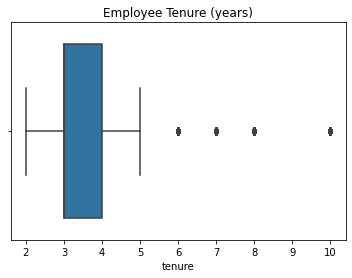

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df0, x='tenure')
plt.title('Employee Tenure (years)')
plt.show()

In [12]:
# Determine the number of rows containing outliers
percentile25 = df0['tenure'].quantile(.25)
percentile75 = df0['tenure'].quantile(.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + (1.5*iqr)
lower_limit = percentile25 - (1.5*iqr)
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

lower_mask = df0['tenure'] < lower_limit
upper_mask = df0['tenure'] > upper_limit

outliers = df0[lower_mask | upper_mask]
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Upper limit: 5.5
Lower limit: 1.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Suprisingly there was not a strong correlation between th enumber of hours worked and the salary. 
2. We see that the employees that worked the most hours were much more likely to leave. We also see that those with a lower satisfaction level are more likley to leave as well. 
3. I used grouping and aggregations as well as boxplots and histogram plots. I also used a heatmap to look to see if there were strong correlations between X variables. 
4. EDA is important to find correlations and information about the data. It can reveal a lot of aspects not easily seen in the Data. You can decide to engineer features based on what is found. 
5. I am using documentation from officisal websites, previous code from previously completed labs, and notes that I took during the course.
6. There is always ethical considerations in every stage. There are no obvious ethical considerations in the features however it should always be something on the mind of those working on the analysis. 

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df0['left'].value_counts())
# Get percentages of people who left vs. stayed
print(df0['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

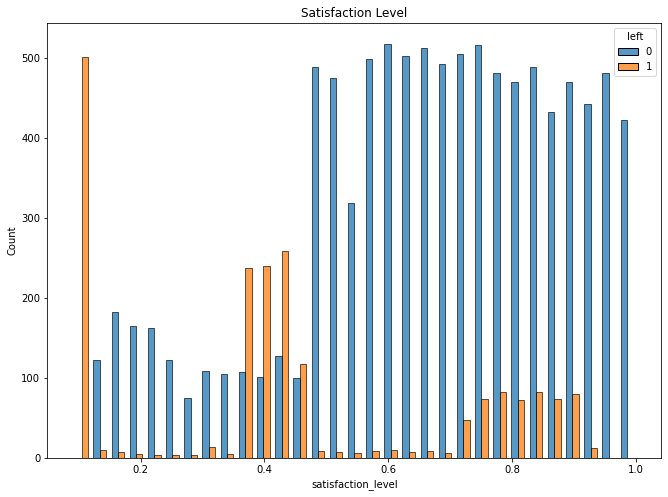

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


In [14]:
# Create a plot as needed
plt.figure(figsize=(11,8))
sns.histplot(x=df0['satisfaction_level'], hue=df0['left'], hue_order=[0,1], multiple='dodge', shrink=.7)
plt.title('Satisfaction Level')
plt.show()
df0.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

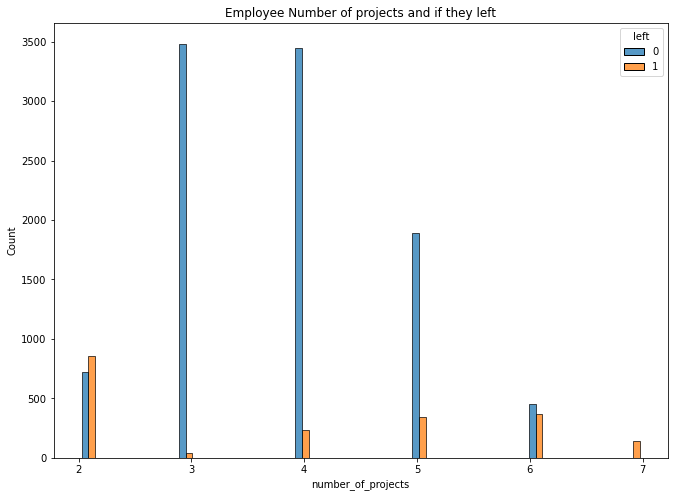

Employees with 7 projects:  satisfaction_level           145
last_evaluation              145
number_of_projects           145
average_monthly_hours        145
tenure                       145
work_accident                145
left                         145
promotion_last_five_years    145
department                   145
salary                       145
dtype: int64
Number of employees with 7 projects who left: 1    145
Name: left, dtype: int64
Employees with 6 projects: 0    455
1    371
Name: left, dtype: int64
Employees with 5 projects: 0    1890
1     343
Name: left, dtype: int64


In [15]:
# Create a plot as needed
plt.figure(figsize=(11,8))
sns.histplot(x=df0['number_of_projects'], hue=df0['left'], hue_order=[0,1], multiple='dodge', shrink=.7)
plt.title("Employee Number of projects and if they left")
plt.show()

print('Employees with 7 projects: ', df0[df0['number_of_projects'] ==7].count())
print('Number of employees with 7 projects who left:', df0[df0['number_of_projects'] ==7]['left'].value_counts())

#This shows that all employees with 7 projects has left

#Viewing those who worked 6 and 5 projects
print('Employees with 6 projects:', df0[df0['number_of_projects'] ==6]['left'].value_counts())
print('Employees with 5 projects:', df0[df0['number_of_projects'] ==5]['left'].value_counts())

#There is slightly more employees that left with 6 projects than those who did not
#There is many more employees that stayed with 5 projects than those who left 

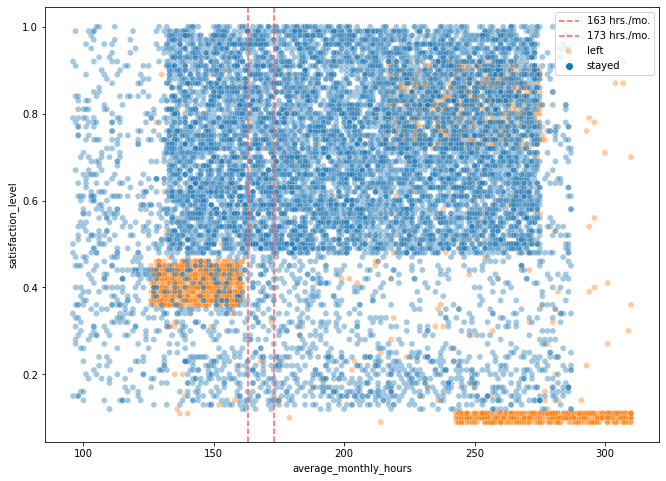

In [16]:
# Create a plot as needed

#If 40 hours a week is standard working hours for full time and we assume some vacation time, 
#then (40 *52)/100 = 173 hrs per month, (40 *49)/100 = 163 hrs per month. 
#So the normal range is anywhere between 163-173 hrs per month

plt.figure(figsize=(11,8))
sns.scatterplot(data=df0, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=163, color='#ff6361', label='163. hrs./mo.', ls='--')
plt.axvline(x=173, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['163 hrs./mo.', '173 hrs./mo.', 'left', 'stayed'])
plt.show()
#We see that those who work more hours tend to be more dissatisfied and more likely to leave
#We also notice that most employees are above the normal full time range 



low       5740
medium    5261
high       990
Name: salary, dtype: int64
Low salary turnover: 0    0.79547
1    0.20453
Name: left, dtype: float64
Medium salary turnover: 0    0.85383
1    0.14617
Name: left, dtype: float64
High salary turnover: 0    0.951515
1    0.048485
Name: left, dtype: float64


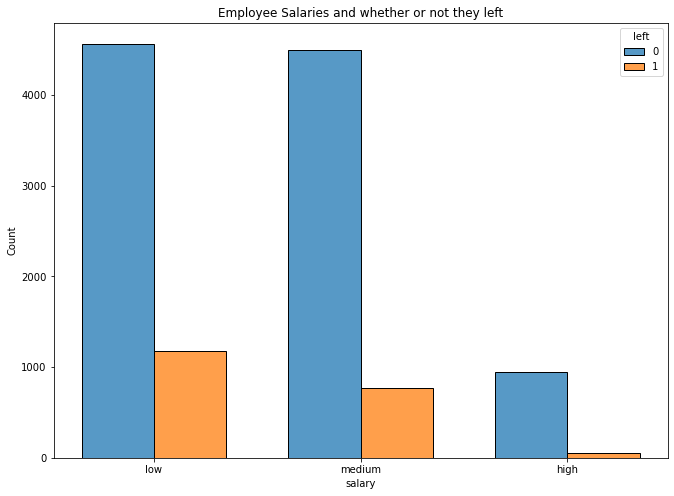

In [17]:
# Create a plot as needed
# Lets look at compensation and promotions 
print(df0['salary'].value_counts())
plt.figure(figsize=(11,8))
sns.histplot(x=df0['salary'], hue=df0['left'], hue_order=[0,1], multiple='dodge', shrink=.7)
plt.title('Employee Salaries and whether or not they left')


print('Low salary turnover:',df0[df0['salary'] =='low']['left'].value_counts(normalize=True))
print('Medium salary turnover:', df0[df0['salary'] =='medium']['left'].value_counts(normalize=True))
print('High salary turnover:', df0[df0['salary'] =='high']['left'].value_counts(normalize=True))

#We see that there is more turnover in the low salary category, less but still significant in the medium, and very little in the high

In [18]:
# Create a plot as needed
df0.groupby('salary')['average_monthly_hours'].mean()

#We don't see the average number of hours change too much between salary types



salary
high      200.067677
low       200.439199
medium    200.587341
Name: average_monthly_hours, dtype: float64

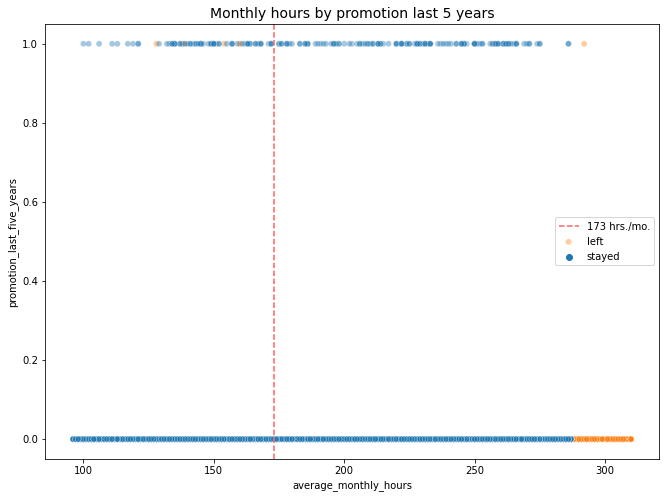

In [19]:
# Create a plot as needed
plt.figure(figsize=(11,8))
sns.scatterplot(data=df0, x='average_monthly_hours', y='promotion_last_five_years', hue='left', alpha=0.4)
plt.axvline(x=173, color='#ff6361', ls='--')
plt.legend(labels=['173 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');


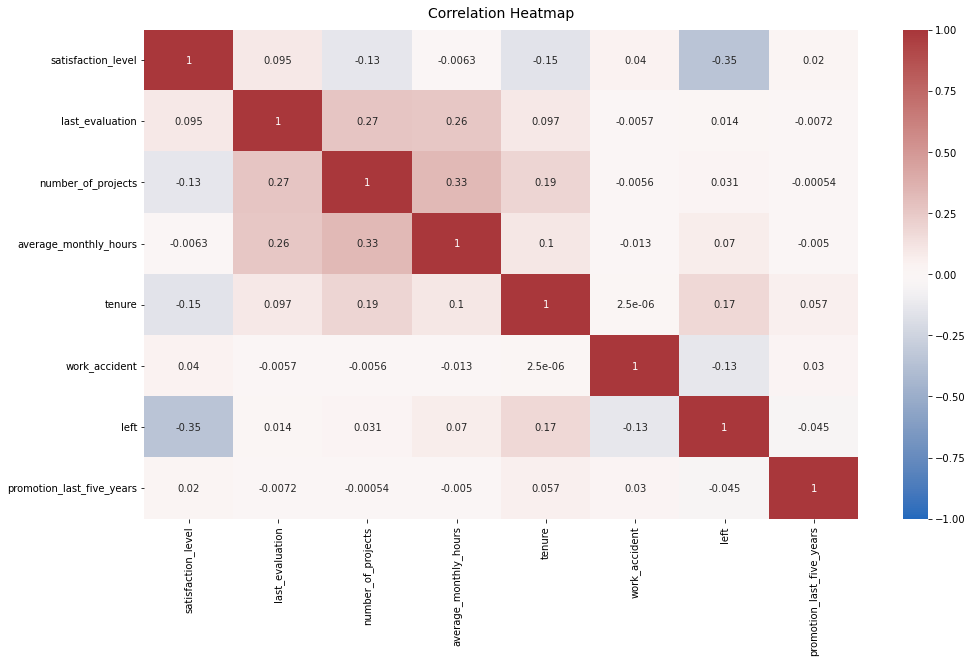

In [20]:
#Check for correlations between variables
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

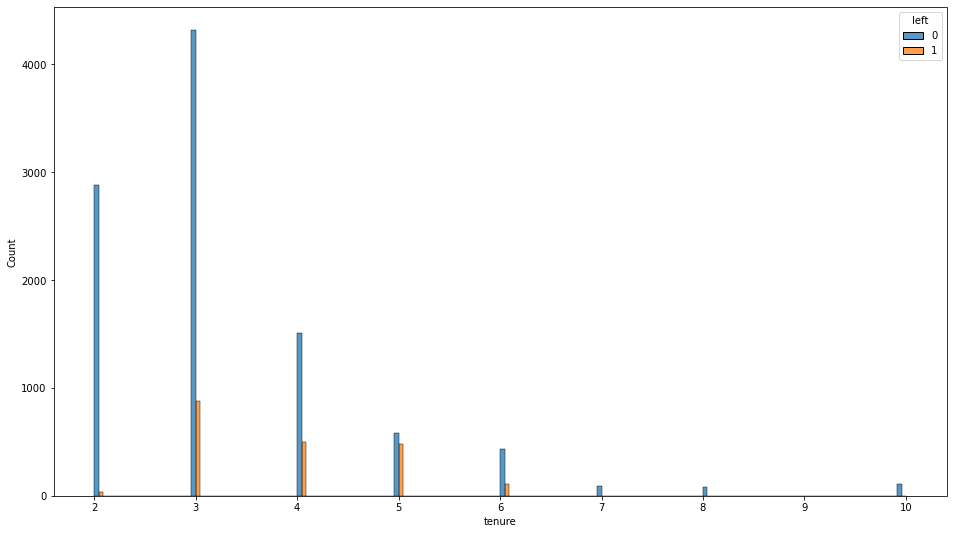

tenure  left
2       0       2879
        1         31
3       0       4316
        1        874
4       0       1510
        1        495
5       0        580
        1        482
6       0        433
        1        109
7       0         94
8       0         81
10      0        107
Name: left, dtype: int64

In [21]:
# We do not see strong correlation between features and therefore the assumption of 
#mutli-colineaity is not broken if logistic regression is chosen as the final model 

#Tenure 
plt.figure(figsize=(16, 9))
sns.histplot(data=df0, x='tenure', hue='left', hue_order=[0,1], multiple='dodge')
plt.show()

df0.groupby('tenure')['left'].value_counts()

Number of Employees who have left by department


department
IT             158
RandD           85
accounting     109
hr             113
management      52
marketing      112
product_mng    110
sales          550
support        312
technical      390
Name: left, dtype: int64

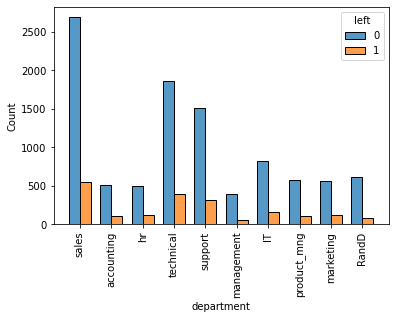

In [22]:
#Employees who left by department
df0.groupby('department')['left'].value_counts()
ax = sns.histplot(data=df0, x='department', hue='left', hue_order=[0,1], multiple='dodge', shrink=.7)
ax.tick_params(axis='x', rotation=90)

#
dfleft = df0[df0['left'] == 1]
print("Number of Employees who have left by department")
dfleft.groupby('department')['left'].count()

### Insights

1. We do not see strong correlation between X features 
2. Those who leave tend to work more hours. 
3. Those who leave tend to have lower satisfaction levels. 
4. Those with High Salaries tend to leave at a much lower rate than those with medium or low salaries. 
5. Those who have been at the company for more than 7 years seem to stay 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. I thought that the fact a majority of employees worked beyond standard hours was odd. Also there were not a lot of promotions. 
2. I choose to include all the independent variables since none seemed to be dependent or highly correlated to each other. 
3. Each assumption should be met. Some caanot be checked until after the model is built. 
4. The Regression model fit the data well, but hte randmom forrest fit the data much better and performed better in testing. 
5. One way to imporve would be to use another model such as a decision tree and evualate how it performs. Then based on the models choose a chmapion model. 
6. I am using documentation from officisal websites, previous code from previously completed labs, and notes that I took during the course.
7. There is always ethical considerations in every stage. There are no obvious ethical considerations in the features however it should always be something on the mind of those working on the analysis. 

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

To predict whether an employee will leave the company. This is a classification task. 

### Identify the types of models most appropriate for this task.

A Logistic Regression Model or a decision tree or random forrest model would be best for this problem. Since a Decision tree by itself is prone to overfitting I beleieva rendom forrest would be a better approach. 

I will be creating a logistic regression model and a random forest model. 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [23]:
# Logistic Regression Model 

In [24]:
### YOUR CODE HERE ###

#Encoding 
df_log = df0.copy()
df_log['salary'] = df_log['salary'].replace({'low':0, 'medium': 1, 'high': 2})
df_log = pd.get_dummies(df_log, drop_first=True)
df_log

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_five_years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,2,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,2,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,1,0,0,0,0


In [25]:
#We saw in the heatmap above that the X variables were not higgly correlated. 
#We do not have reason to beleive that any of the X variables are dependent



In [26]:
#Outliers 
#We prepared outliers previously, for logistic regression they should be removed before building the model 
df_log = df_log[(df_log['tenure'] <= upper_limit) & (df_log['tenure'] >= lower_limit)]
df_log

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_five_years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,1,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,0,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,0,1,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,1,0,0,1,0,0,0,0,0,0,0,0,0


In [33]:
#Class Balance
df_log['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [27]:
#Create X and Y dfs 
X = df_log.copy()
X = X.drop(columns=['left'])

y = df_log['left']

print(y.head())
X.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64


,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,promotion_last_five_years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
#Splitting into Training and Testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [30]:
#Fitting the model 
log_clf = LogisticRegression(random_state=42, max_iter=500)
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
#Predictions
y_pred = log_clf.predict(X_test)

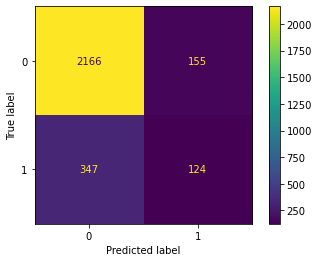

In [34]:
#Confusion Matrix 
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [36]:
#True Negatives - 2166 - Number of people who did not leave that model predicted would not leave  
#True Positives - 124 - Number of people who left that model predicted would leave
#False Positives - 155 - Number of people that did not leave that model predicted would leave 
#False Negatives - 347 - Number of people who left that model predcited would not leave 
print(classification_report(y_test, y_pred))

#Scores
#precision - .79
#recall - .82
#f1-score-.8
#accuracy .82

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2321
           1       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



In [ ]:
#Random Forest 

In [37]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Parameters 
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [38]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [39]:
#Check best score
rf1.best_score_

0.9801368318614936

In [40]:
#Best Parameters 
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [48]:
def make_results(model_name:str, model_object, metric:str):
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table
rf2_results = make_results('Random Forest Results', rf1, 'auc')
rf2_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest Results,0.968247,0.908588,0.937377,0.979583,0.980137


In [50]:
#Score Test Function 
def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table


In [51]:
#Tesing 
#Get scores on test data 
rf1_test_scores = get_scores('random forest test results', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest test results,0.98427,0.929936,0.956332,0.985673,0.96346


In [56]:
#Feature Importance 
feat_impt = rf1.best_estimator_.feature_importances_
feature_importances = pd.DataFrame(feat_impt, columns=['importance'], index=X.columns)
feature_importances


,importance
satisfaction_level,0.526992
last_evaluation,0.122335
number_of_projects,0.135764
average_monthly_hours,0.050487
tenure,0.162992
work_accident,0.000015
promotion_last_five_years,0.000000
salary,0.000523
department_RandD,0.000058
department_accounting,0.000136


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. We see that satisfaction level is the highest indicator of whether or not an employee will leave a company. We also see that those with high salary are less likely to leave than those with a medium or low salary. Those who worked on 7 projects all left. Those who worked on 6 were much more likely to leave. 
2 and 3. Since it is not obvious how to imporve the satisfaction level we can look at some of the otherSome reccomendations would be to limit the amount of projects an employee is working on to 5 or less. There can also be a limit to the amount of overtime hours an employee can work or better compensation for those who work more than standard hours. 
4. The model may be imporved by running more models or changing hyperparameters and then choosing a champion model. 
5. Some other questions might include what exactly are in the low medium and high salary ranges. You could also go deeper into the link between satisfaction level and how the other features correlate to it. Other relationships such as the persons tenure and how many projects and hours they have worked might be another good thing to analyze. 
6. I am using documentation from officisal websites, previous code from previously completed labs, and notes that I took during the course.
7. There is always ethical considerations in every stage. There are no obvious ethical considerations in the features however it should always be something on the mind of those working on the analysis.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Logistic Regression

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

Tree-based Machine Learning

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

Cap the number of projects that employees can work on.
Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
Either reward employees for working longer hours, or don't require them to do so.
If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.